In [1]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import json
import re
import random
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_sentiment(document):
    #create TextBlob object of tweet
    analysis = TextBlob(document)

    #get and return positive or negative polarity
    if analysis.sentiment.polarity > 0 :
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)


In [3]:
#### File Loading and Processing #####

original_corpus = []      # For storing the non-stemmed tokens
tokenizer = RegexpTokenizer(r'\w+')
data_path = "defundThePolice.txt"
tweets_file = open(data_path, 'r')
tweet_count = 0

# keywords = ["defund", "police"]
# keywords = [""]

#Read File and save tweets into a string
for line in tweets_file:
    # strip() function removes end-of-line characters at the end
    # After removing end-of-line characters, see if the line still
    # contains any data. If it does, len() will be > 0.
    # If that's the case, let's save this Tweet Object into our LIST.
    if len(line.strip()) > 0:
        tweet = json.loads(line) # each line is a JSON object
        if 'text' in tweet and tweet['lang'] == 'en':
            text = (tweet['text']).lower()
            
            original_corpus.append(text)
            # for keyword in keywords:
                # if keyword == keywords[-1] and keyword in text:
                    # tokens = tokenizer.tokenize(text)
                    # original_corpus.append(" ".jointokens)) #store original document
                    # original_corpus.append(text)
                # elif keyword not in text:
                    # break

            tweet_count += 1

            if tweet_count % 10000 == 0:
                print("Tweets Read:", tweet_count)

print("Total tweets read:", tweet_count)
print("Number of tweets containing keyword:",len(original_corpus))

Tweets Read: 10000
Total tweets read: 12721
Number of tweets containing keyword: 12721


In [56]:
###### Sentiment Analysis using Textblob's Pattern Analyzer ######

pTweets_pattern = []
neuTweets_pattern = []
negTweets_pattern = []

count = 0
for doc in original_corpus:
    #pattern
    if get_sentiment(doc) == 'positive':
        pTweets_pattern.append(doc)
    elif get_sentiment(doc) == 'neutral':
        neuTweets_pattern.append(doc)
    else:
        negTweets_pattern.append(doc)
    
    count += 1
    if count % 10000 == 0:
        print("Document Sorted:",count)

print("Total Document Sorted:", count)

print("\nTextblob Pattern Analyzer")
print("Positive tweets percentage: {} %".format(100*len(pTweets_pattern)/len(original_corpus)))

print("Negative tweets percentage: {} %".format(100*len(negTweets_pattern)/len(original_corpus)))

print("Neutral tweets percentage: {} %".format(100*len(neuTweets_pattern)/len(original_corpus)))

Document Sorted: 10000
Total Document Sorted: 12128

Textblob Pattern Analyzer
Positive tweets percentage: 26.599604221635882 %
Negative tweets percentage: 18.568601583113455 %
Neutral tweets percentage: 54.83179419525066 %


In [64]:
#### Printing out random sample of 5 tweets from each category for analysis ###
print("Pattern Analyzer Tweets")
print("\nPositive Tweets")
print(random.choices(pTweets_pattern, k=5))

print("\nNegative Tweets")
print(random.choices(negTweets_pattern,k=5))

print("\nNeutral Tweets")
print(random.choices(neuTweets_pattern,k=5))

Pattern Analyzer Tweets

Positive Tweets
['rt @hungrybowtie: so many clouds of tear gas tonight, the police have literally dragged people into the middle of clouds to arrest them. #p…', "rt @13374nt1f458008: riot trucks just went north on 2nd. looks like they're getting ready to chase everyone out of the park. group is on th…", 'rt @gayhouse90: important. #rosecityjustice #portlandprotest #acab #nojusticenopeace https://t.co/upkvaaczat', 'rt @lfteotw: new video of the arrest of portland journalist randal mccorkie #protest2020, #portlandprotests, #portlandprotest, #portlandore…', 'rt @sanctuaryus: the portland police sound truck sounds progressively more like that voice from half life 2.\n\n#portlandprotests #portlandpr…']

Negative Tweets
['rt @pdocumentarians: federal officers just stormed out of the the courthouse and arrested one person. charges currently unknown, witnesses…', 'rt @laruebartell: #portlandprotest #antifa #blacklivesmatter white people looting &amp; trashing portland 

In [61]:
### Sentiment Analysis using TextBlob NaiveBayesAnalyzer ###
pTweets_naive = []
negTweets_naive =[]
sample_size = 373
count = 0
for doc in random.choices(original_corpus,k=sample_size):
    #naive bayes
    blob = TextBlob(doc, analyzer=NaiveBayesAnalyzer())
    if blob.sentiment.classification == "pos":
        pTweets_naive.append(doc)
    else:
        negTweets_naive.append(doc)

    count+= 1
    if count % 100 == 0:
        print("Analyzed:",count)

print("Total Analyzed:", count)
print("\nTextblob NaiveBayesAnalyzer")

print("Positive tweets percentage: {} %".format(100*len(pTweets_naive)/sample_size))

print("Negative tweets percentage: {} %".format(100*len(negTweets_naive)/sample_size))

Analyzed: 100
Analyzed: 200
Analyzed: 300
Total Analyzed: 373

Textblob NaiveBayesAnalyzer
Positive tweets percentage: 47.98927613941019 %
Negative tweets percentage: 52.01072386058981 %


In [63]:
### Printing out random sample of 5 tweets from each category for analysis ###
print("\nNaive Analyzer Tweets")

print("\nPositive Tweets")
print(random.choices(pTweets_naive, k=5))

print("\nNegative Tweets")
print(random.choices(negTweets_naive,k=5))


Naive Analyzer Tweets

Positive Tweets
["welcome to the world's smallest autonomous zone. #portlandprotest #portlandprotests #pdxprotest #pdxprotests https://t.co/0dzcqvyvuz", 'rt @gayhouse90: important. #rosecityjustice #portlandprotest #acab #nojusticenopeace https://t.co/upkvaaczat', 'rt @commieskum: this car just pointed a gun at me. he has a a q flag #portlandprotest #pdx https://t.co/rgoybbbgae', 'rt @hungrybowtie: a huge cloud of tear gas. #portlandprotest #blacklivesmatter\xa0\xa0 #pdxprotests #pdx #portlandoregon #blm #acab #4thofjuly #p…', 'rt @r3volutiondaddy: feds hiding in bushes by terry shrunk. saw a few walking out. a few remain #defendpdx #blacklivesmatter #portlandprote…']

Negative Tweets
['rt @r3volutiondaddy: he was having a seizure and the feds attacked him. this is why they held the line at 7/11 and gassed and beat us. #bla…', 'rt @gravemorgan: out here for what i think is the 43 night of protest at the portland justice center. the elk statue has been reborn as 

In [4]:
### Sentiment Analysis using VADER ###
positive_post = []
negative_post = []
neutral_post = []

analyzer = SentimentIntensityAnalyzer()
for sentence in original_corpus:
    vs = analyzer.polarity_scores(sentence)
    
    if vs["compound"]>=0.05:
        positive_post.append(sentence)
    elif vs["compound"]<= -0.05:
        negative_post.append(sentence)
    else:
        neutral_post.append(sentence)
    
    # print("{:-<65} {}".format(sentence, str(vs)))

print("VADER Analysis")
print("Positive Posts :", len(positive_post)/len(original_corpus)*100,"%")
print("Negative Posts :", len(negative_post)/len(original_corpus)*100,"%")
print("Neutral Post :",len(neutral_post)/len(original_corpus)*100,"%")

VADER Analysis
Positive Posts : 37.5442182218379 %
Negative Posts : 44.108167596887036 %
Neutral Post : 18.347614181275056 %


In [67]:
#### Printing out random sample of 5 tweets for analysis ###

print("\nPositive Posts")
sample_pos_posts = random.choices(positive_post,k=5)

for sentence in sample_pos_posts:
    vs = analyzer.polarity_scores(sentence)
    print("{} {}".format(sentence, str(vs)))

print("\nNegative Posts")
sample_neg_posts = random.choices(negative_post,k=5)

for sentence in sample_neg_posts:
    vs = analyzer.polarity_scores(sentence)
    print("{} {}".format(sentence, str(vs)))

print("\nNeutral Posts")
sample_neu_posts = random.choices(neutral_post,k=5)

for sentence in sample_neu_posts:
    vs = analyzer.polarity_scores(sentence)
    print("{} {}".format(sentence, str(vs)))


Positive Posts
rt @defendpdx: lets talk about this account. they have been in my dm’s and seemed helpful to the movement and #portlandprotest. i looked th… {'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'compound': 0.4215}
rt @13374nt1f458008: riot trucks just went north on 2nd. looks like they're getting ready to chase everyone out of the park. group is on th… {'neg': 0.118, 'neu': 0.719, 'pos': 0.163, 'compound': 0.1027}
rt @r3volutiondaddy: 2008 y’all. there’s a good chance this teargas is beyond expired #blacklivesmatter #portlandprotests #portlandprotest… {'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'compound': 0.5994}
rt @r3volutiondaddy: alright my radical leftist marxist anarchistic friends... y’all  ready to attack and dethrone god?
 #blacklivesmatter… {'neg': 0.125, 'neu': 0.484, 'pos': 0.391, 'compound': 0.6808}
rt @jevarapper: hey @portlandpolice was it really safer for everyone to be followed with teargas for an hour instead of the guy with medica… {'neg': 0.0, 'neu': 0.881, 'pos':

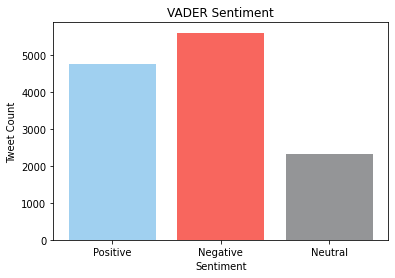

In [5]:
### Plotting positve:negative:neutral sentiment against count ###
labels = ["Positive","Negative","Neutral"]
values = [len(positive_post),len(negative_post),len(neutral_post)]

plt.bar(labels,values, color=["#a0d0f0","#f8665e","#949597"])
plt.title("VADER Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.savefig("VADERBarChart.png",dpi=300)
plt.show()
